This is an analysis aiming to answer the following questions:

1) What kind of breed are most likely to get adopted?
2) What age of dogs are most likely to get adopted? What are the most common age for a dog to arrive at the shelter?
3) Does the dog color have an effect on adoption?
4) Does the dog gender/neutered(or not) combination have an impact on the adoption rate?
5) What is the most common dog name for female dogs?
6) What is the most common dog name for male dogs?
8) Which months are the adopted rate the highest? Which DOW have the highest adoption rate?
9) How many animals are returned back to the shelter after an adoption?
10) Build a ML model to predict the adoption rate based on dog features
11) Tune and Evaluation the model 


Data Exploration and Visulization 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
aac=pd.read_csv('Austin_Animal_Center_Outcomes.csv')

In [8]:
aac.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico
1,A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan
2,A721285,NaN,02/24/2016 02:42:00 PM,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray
3,A697000,Boone,02/16/2015 01:24:00 PM,02/16/2015 01:24:00 PM,02/16/2009,Return to Owner,NaN,Dog,Neutered Male,6 years,English Springer Spaniel Mix,Liver/White
4,A697055,Megatron,02/17/2015 03:06:00 PM,02/17/2015 03:06:00 PM,02/17/2012,Adoption,NaN,Dog,Spayed Female,3 years,Dachshund/Chihuahua Shorthair,Red


In [9]:
aac.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,81048,56329,81048,81048,81048,81038,37069,81048,81046,81037,81048,81048
unique,73199,14854,66772,66772,5974,9,19,5,5,46,2180,532
top,A721033,Bella,04/18/2016 12:00:00 AM,04/18/2016 12:00:00 AM,09/01/2015,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,14,364,39,39,113,34379,20187,46089,28816,14976,23894,8430


In [10]:
aac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81048 entries, 0 to 81047
Data columns (total 12 columns):
Animal ID           81048 non-null object
Name                56329 non-null object
DateTime            81048 non-null object
MonthYear           81048 non-null object
Date of Birth       81048 non-null object
Outcome Type        81038 non-null object
Outcome Subtype     37069 non-null object
Animal Type         81048 non-null object
Sex upon Outcome    81046 non-null object
Age upon Outcome    81037 non-null object
Breed               81048 non-null object
Color               81048 non-null object
dtypes: object(12)
memory usage: 7.4+ MB


In [11]:
acc=aac.dropna(subset=['Age upon Outcome'],inplace=True)

In [12]:
aac.shape

(81037, 12)

In [13]:
dog=aac[aac['Animal Type']=='Dog']
cat=aac[aac['Animal Type']=='Cat']
dog.set_index('Animal ID').head(5)


,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
Animal ID,,,,,,,,,,,
A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan
A697000,Boone,02/16/2015 01:24:00 PM,02/16/2015 01:24:00 PM,02/16/2009,Return to Owner,NaN,Dog,Neutered Male,6 years,English Springer Spaniel Mix,Liver/White
A697055,Megatron,02/17/2015 03:06:00 PM,02/17/2015 03:06:00 PM,02/17/2012,Adoption,NaN,Dog,Spayed Female,3 years,Dachshund/Chihuahua Shorthair,Red
A746650,Rose,04/07/2017 11:58:00 AM,04/07/2017 11:58:00 AM,04/06/2016,Return to Owner,NaN,Dog,Intact Female,1 year,Labrador Retriever/Jack Russell Terrier,Yellow
A666430,Lucy,11/07/2013 11:47:00 AM,11/07/2013 11:47:00 AM,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown


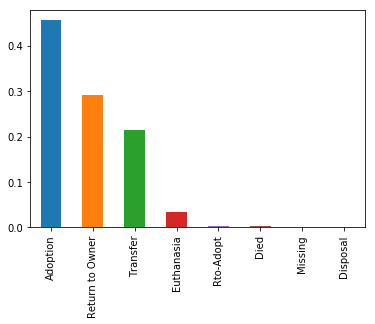

In [14]:
dog['Outcome Type'].value_counts(normalize=True).plot(kind='bar')

<function matplotlib.pyplot.tight_layout>

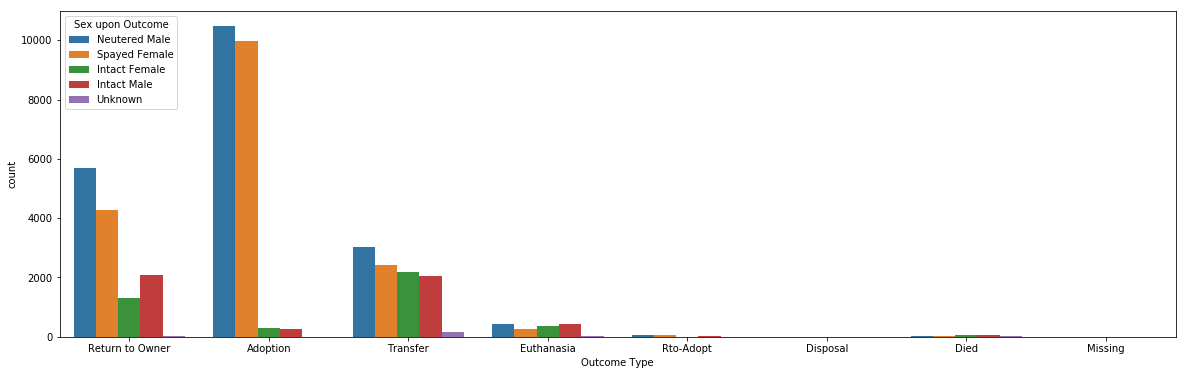

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(x='Outcome Type',hue='Sex upon Outcome',data=dog)
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

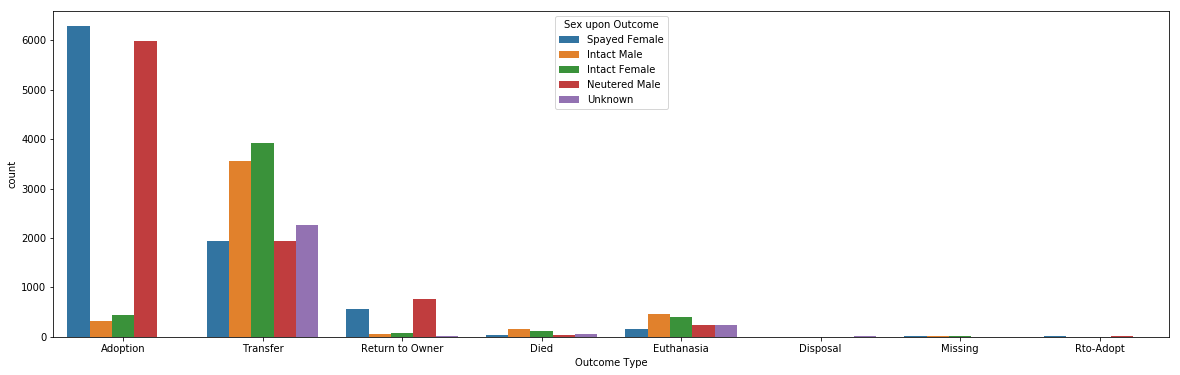

In [16]:
plt.figure(figsize=(20,6))
sns.countplot(x='Outcome Type',hue='Sex upon Outcome',data=cat)
plt.tight_layout

In [17]:
aac['Sex upon Outcome'].value_counts()

Neutered Male    28814
Spayed Female    26101
Intact Male       9849
Intact Female     9412
Unknown           6860
Name: Sex upon Outcome, dtype: int64

Feature Engineering

In [18]:
#type(dog['DateTime']: this is a string which needs to be converted to Datetime objects
# sex upon outcome is also a string which needs to be converted to categorical data
# spay/neuter will be converted to categorial data
aac['dogcat']=aac['Animal Type'].apply(lambda x:1 if x=='Cat' or x=='Dog' else 0)
aac['DateTime']=pd.to_datetime(aac['DateTime'])
aac['month']=aac['DateTime'].apply(lambda time:time.month)
aac['year']=aac['DateTime'].apply(lambda time:time.year)
aac['weekday']=aac['DateTime'].apply(lambda time:time.weekday())
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
aac['Day of Week'] = aac['weekday'].map(dmap)
aac['Gender']=aac['Sex upon Outcome'].apply(lambda x:0 if x=='Neutered Male'or x== 'Intact Male' else (3 if x=='Unknown' else 2))
aac['Spay/Neuter'] = np.where(aac['Sex upon Outcome'].str.contains('Intact'), 'No', 'Yes')

In [19]:
# there is this hypothesis that black dog/cats are not easily adopted, a new feature : black pet will be created
aac['black pet']=aac['Color'].apply(lambda x:1 if x.lower()=='black' else 0)


In [20]:
# translate age into nr of years, age column is string, needs to be converted to int using str.split().astype(int)
aac = aac[aac['Age upon Outcome'] != 'NULL']
aac['Periods'], aac['Period Range'] = aac['Age upon Outcome'].str.split(' ').str[0].fillna(0).astype(int), aac['Age upon Outcome'] .str.split(' ').str[1].fillna(0)


In [21]:
#convert all the time unit into year.
aac['Period Range']=np.where(aac['Period Range'].str.contains('day'),0.0027,np.where(aac['Period Range'].str.contains('week'),0.0208,np.where(aac['Period Range'].str.contains('month'),0.083,np.where(aac['Period Range'].str.contains('year'),1,0)))).astype(float)
aac['age'] = aac['Period Range'] * aac['Periods']

In [31]:
# create a dog dataframe, put dog age into age group: 
dog=aac[aac['Animal Type']=='Dog']

dog['age group'] = np.where(dog['age'] >= 8, 'senior', np.where(dog['age']>=5,'adult',np.where(dog['age']>=1,'young adult','baby')))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [23]:
# Remove the mix in the breed name since it doesn't add any information on the breed
dog['Breed'] = dog['Breed'].str.lower().str.replace('mix', '')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
adopted_dog=dog[dog['Outcome Type']=='Adoption']
dog=aac[aac['Animal Type']=='Dog']
cat=aac[aac['Animal Type']=='Cat']


In [25]:
#till here, features are cleaned up and new features are added.


In [26]:
#Time to answer those questions


<function matplotlib.pyplot.tight_layout>

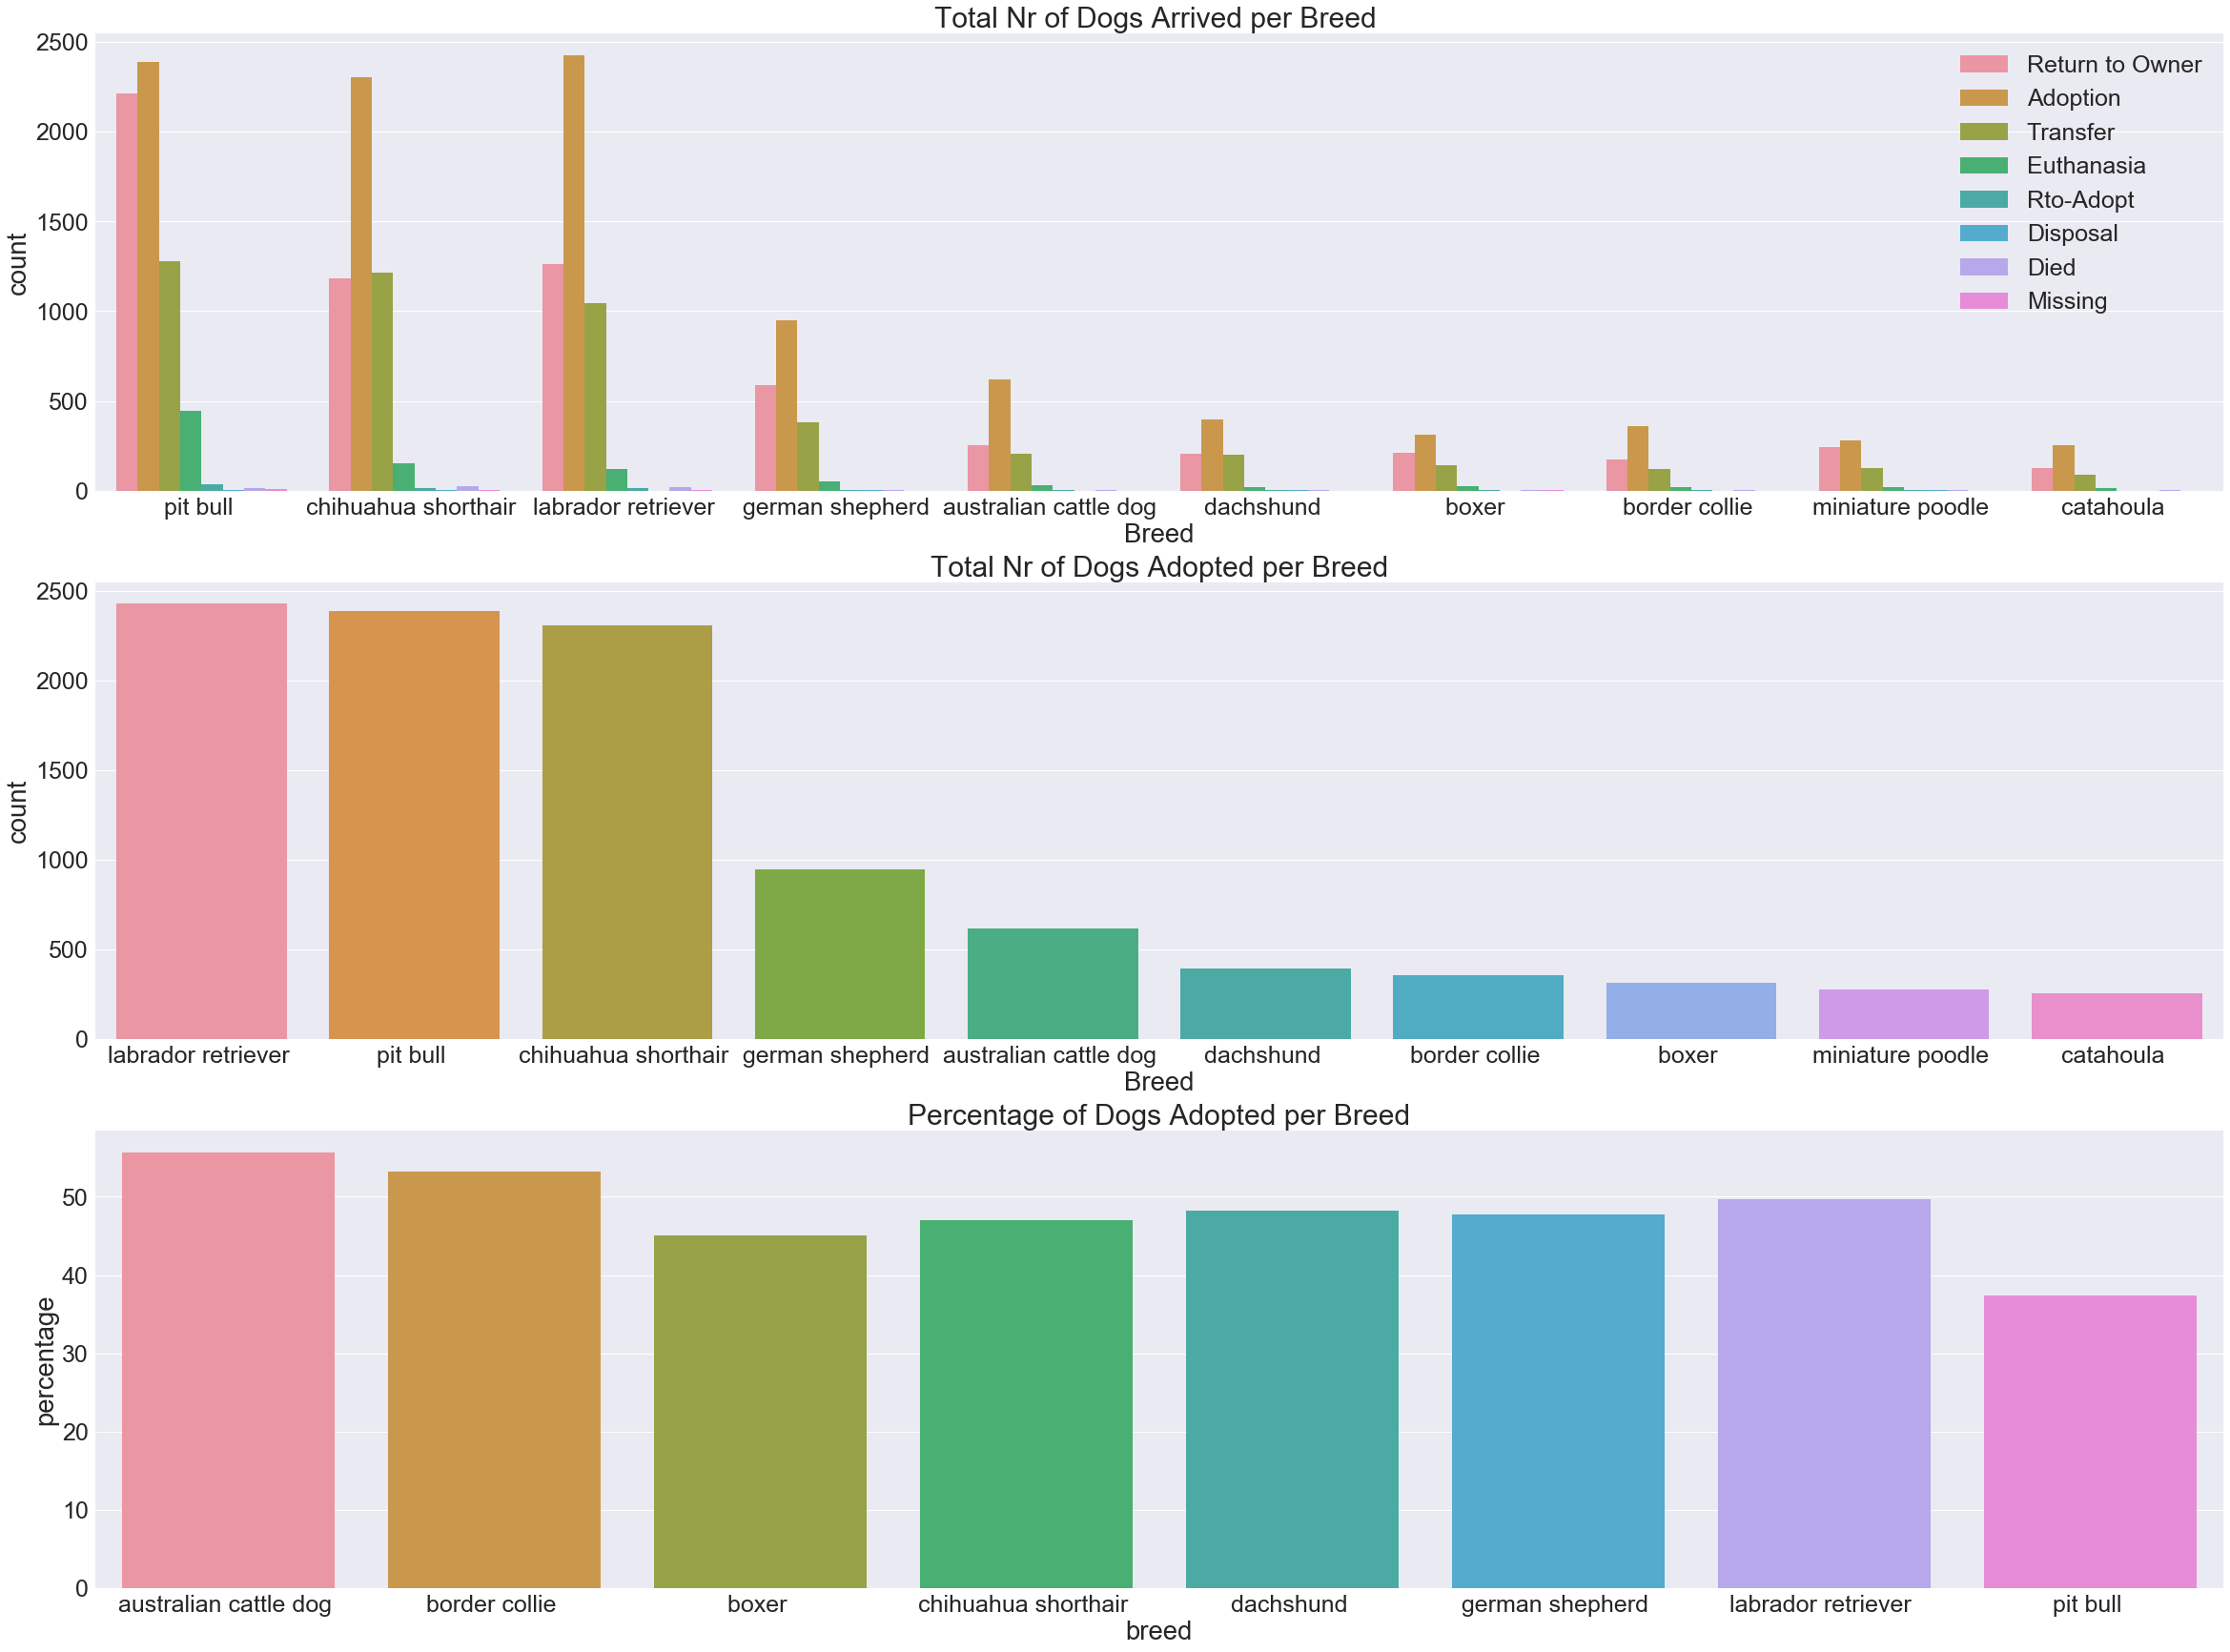

In [120]:
# What are the most breed coming to the shelter? Pit Bull mix is the most number of breed, while with lab retriever being the most adopted dog


df1=pd.DataFrame(adopted_dog['Breed'].value_counts().head(8))
df1=df1.rename(columns = {'Breed':'adopted'})
df2=pd.DataFrame(dog['Breed'].value_counts().head(8))
df2=df2.rename(columns={'Breed':'total'})
result = pd.concat([df1, df2], axis=1).reset_index()
result['percentage']=result['adopted']/result['total']*100
result=result.rename(columns={'index':'breed'})

fig, ax = plt.subplots(3,figsize=(40,30))
sns.set_style("whitegrid")
sns.set(font_scale=2.5)
ax1=sns.countplot(x = 'Breed',data = dog,hue='Outcome Type',order = dog['Breed'].value_counts().head(10).index,ax=ax[0])
ax2=sns.countplot(x = 'Breed',data = adopted_dog,order = adopted_dog['Breed'].value_counts().head(10).index,ax=ax[1])
ax3=sns.barplot(x='breed',y='percentage',data=result)

ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax1.set_title('Total Nr of Dogs Arrived per Breed ')
ax2.set_title('Total Nr of Dogs Adopted per Breed')
ax3.set_title('Percentage of Dogs Adopted per Breed')
plt.tight_layout


<function matplotlib.pyplot.tight_layout>

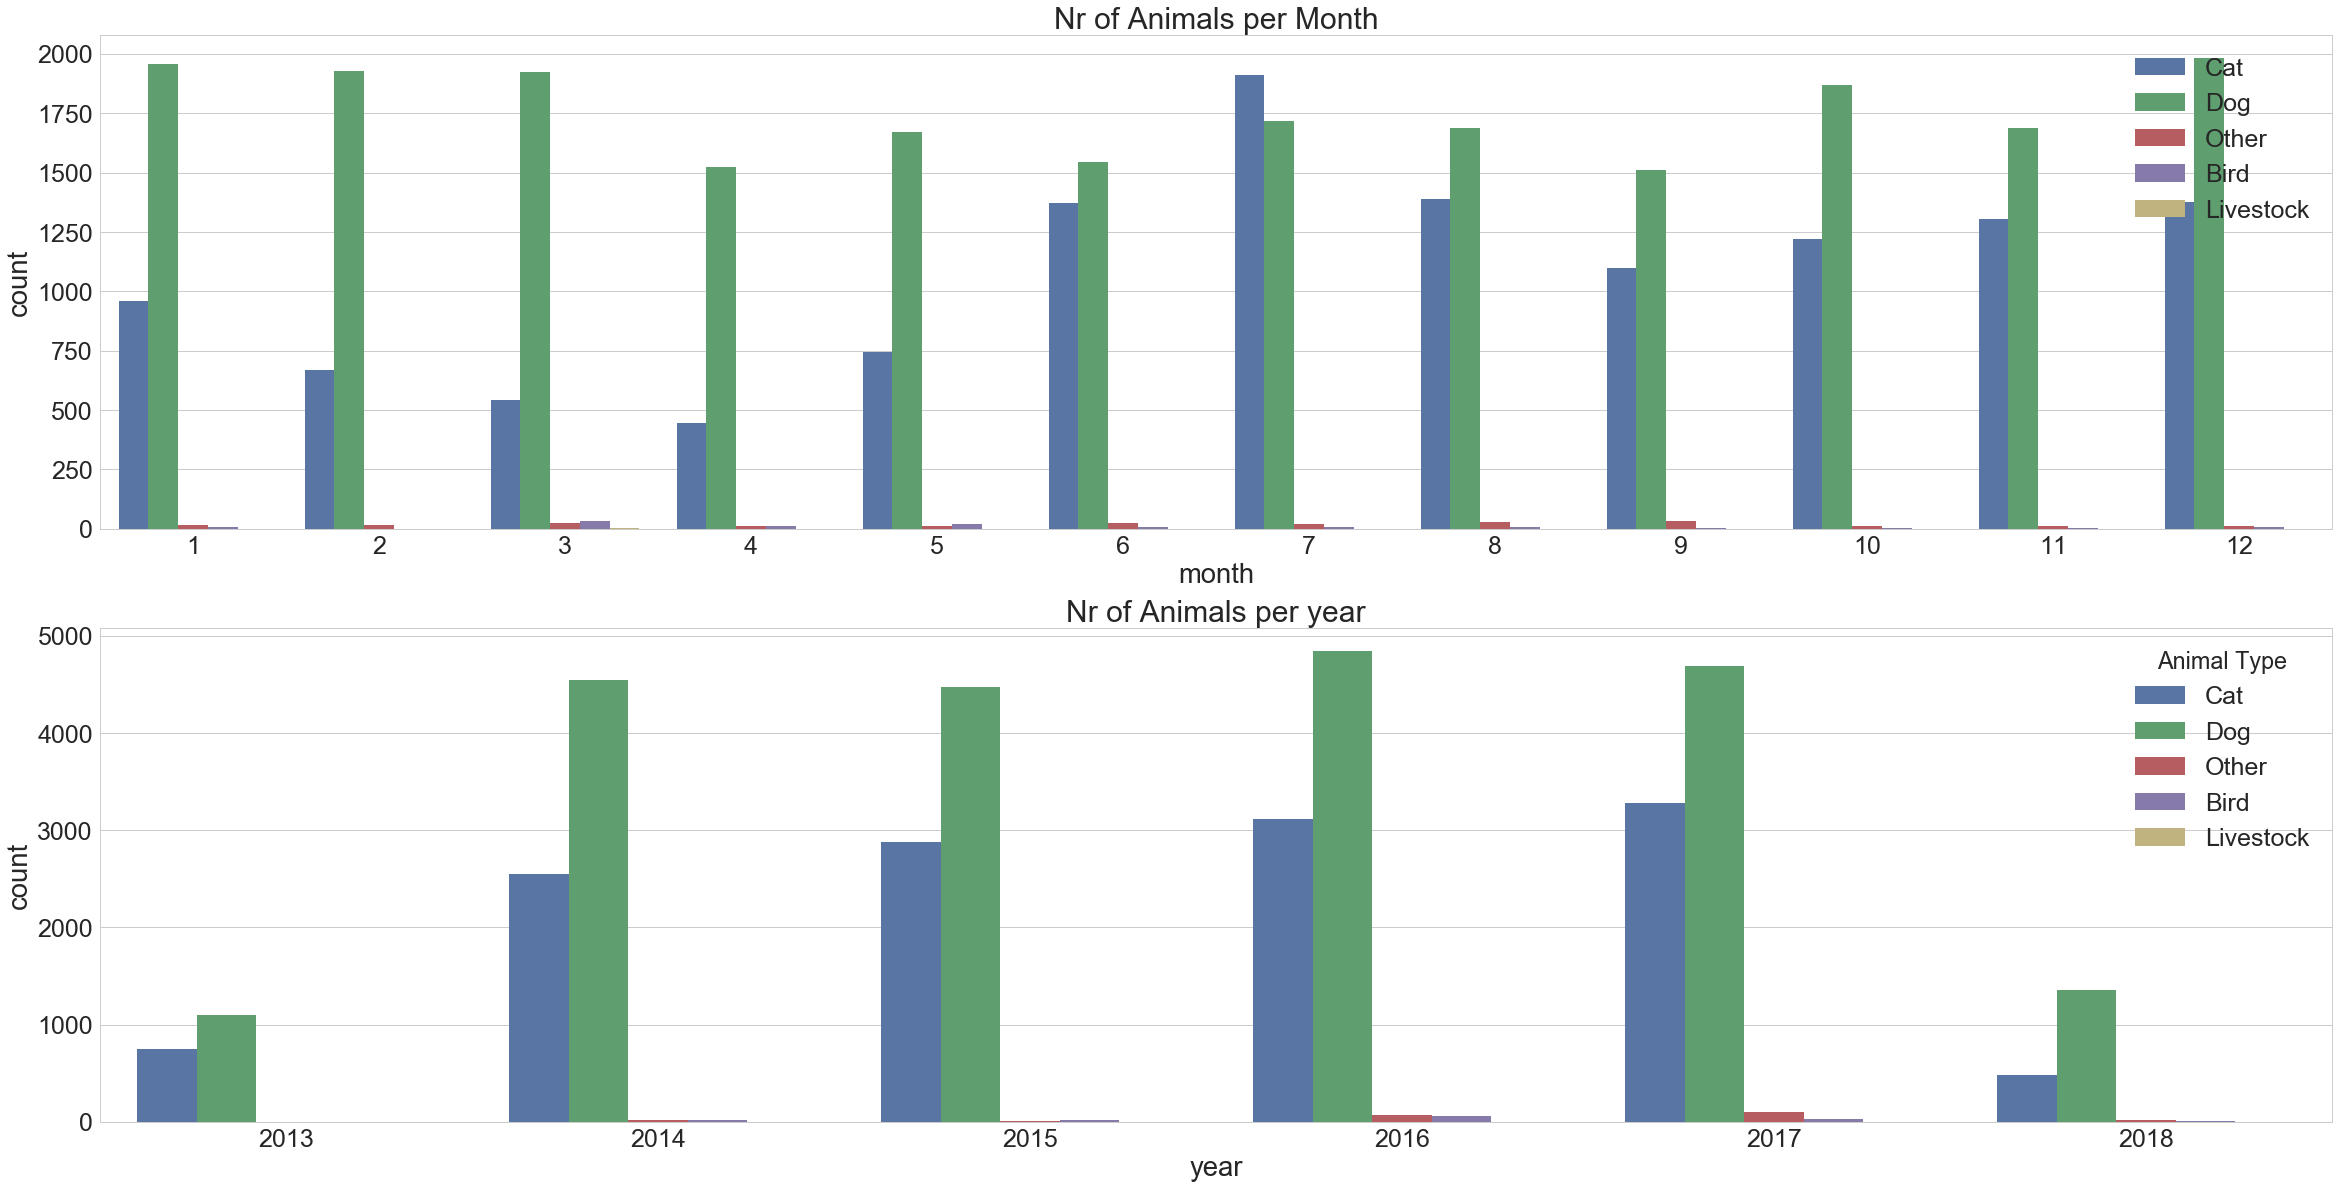

In [285]:
# which months does AAC have the most dogs/cats adopted? which years does AAC have the most dogs/cats adopted?
fig, ax= plt.subplots(2,figsize=(40,20))


sns.set_style("whitegrid")

ax4=sns.countplot(x='month',hue='Animal Type',data=aac[aac['Outcome Type']=='Adoption'],ax=ax[0])
ax4.legend(loc='upper right', bbox_to_anchor=(1, 1))

ax5=sns.countplot(x='year',hue='Animal Type',data=aac[aac['Outcome Type']=='Adoption'],ax=ax[1])
ax4.set_title('Nr of Animals per Month')
ax5.set_title('Nr of Animals per year')
plt.tight_layout

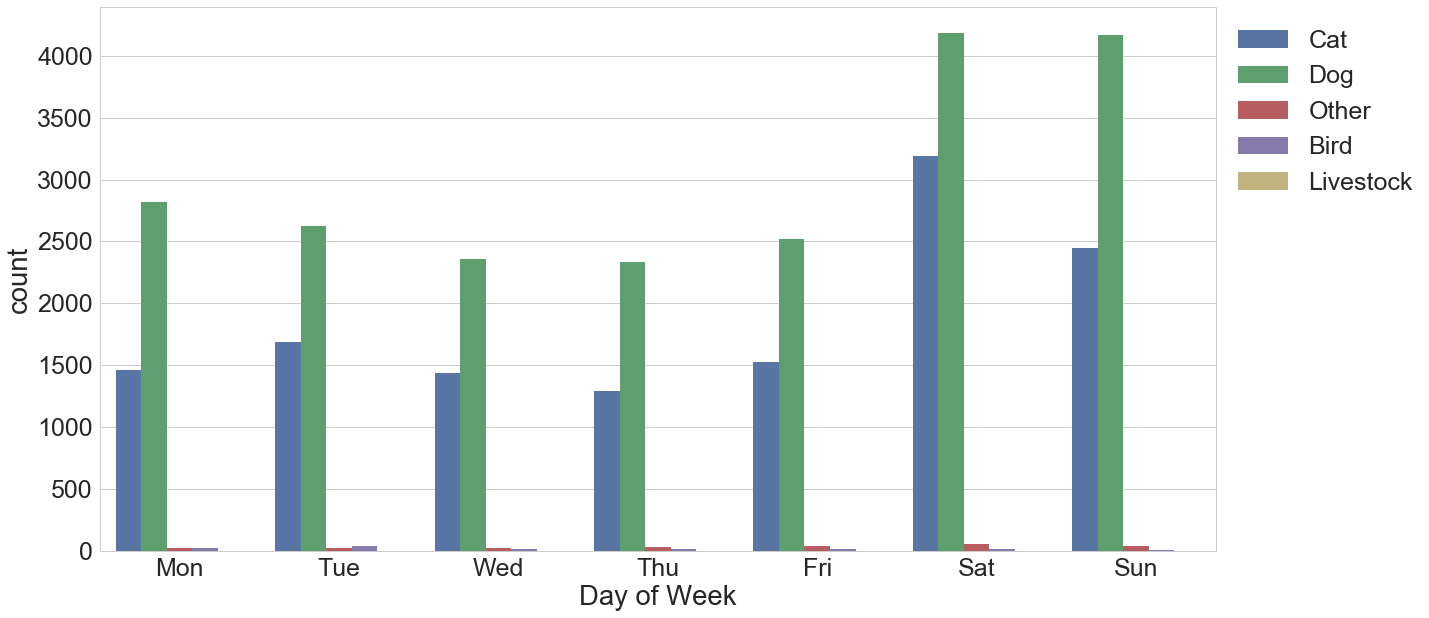

In [155]:
# which DOW does AAC have the most adoptions?

plt.figure(figsize=(20,10))

ax6=sns.countplot(x='Day of Week',hue='Animal Type',data=aac[aac['Outcome Type']=='Adoption'],order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

ax6.legend(loc='upper left', bbox_to_anchor=(1, 1))


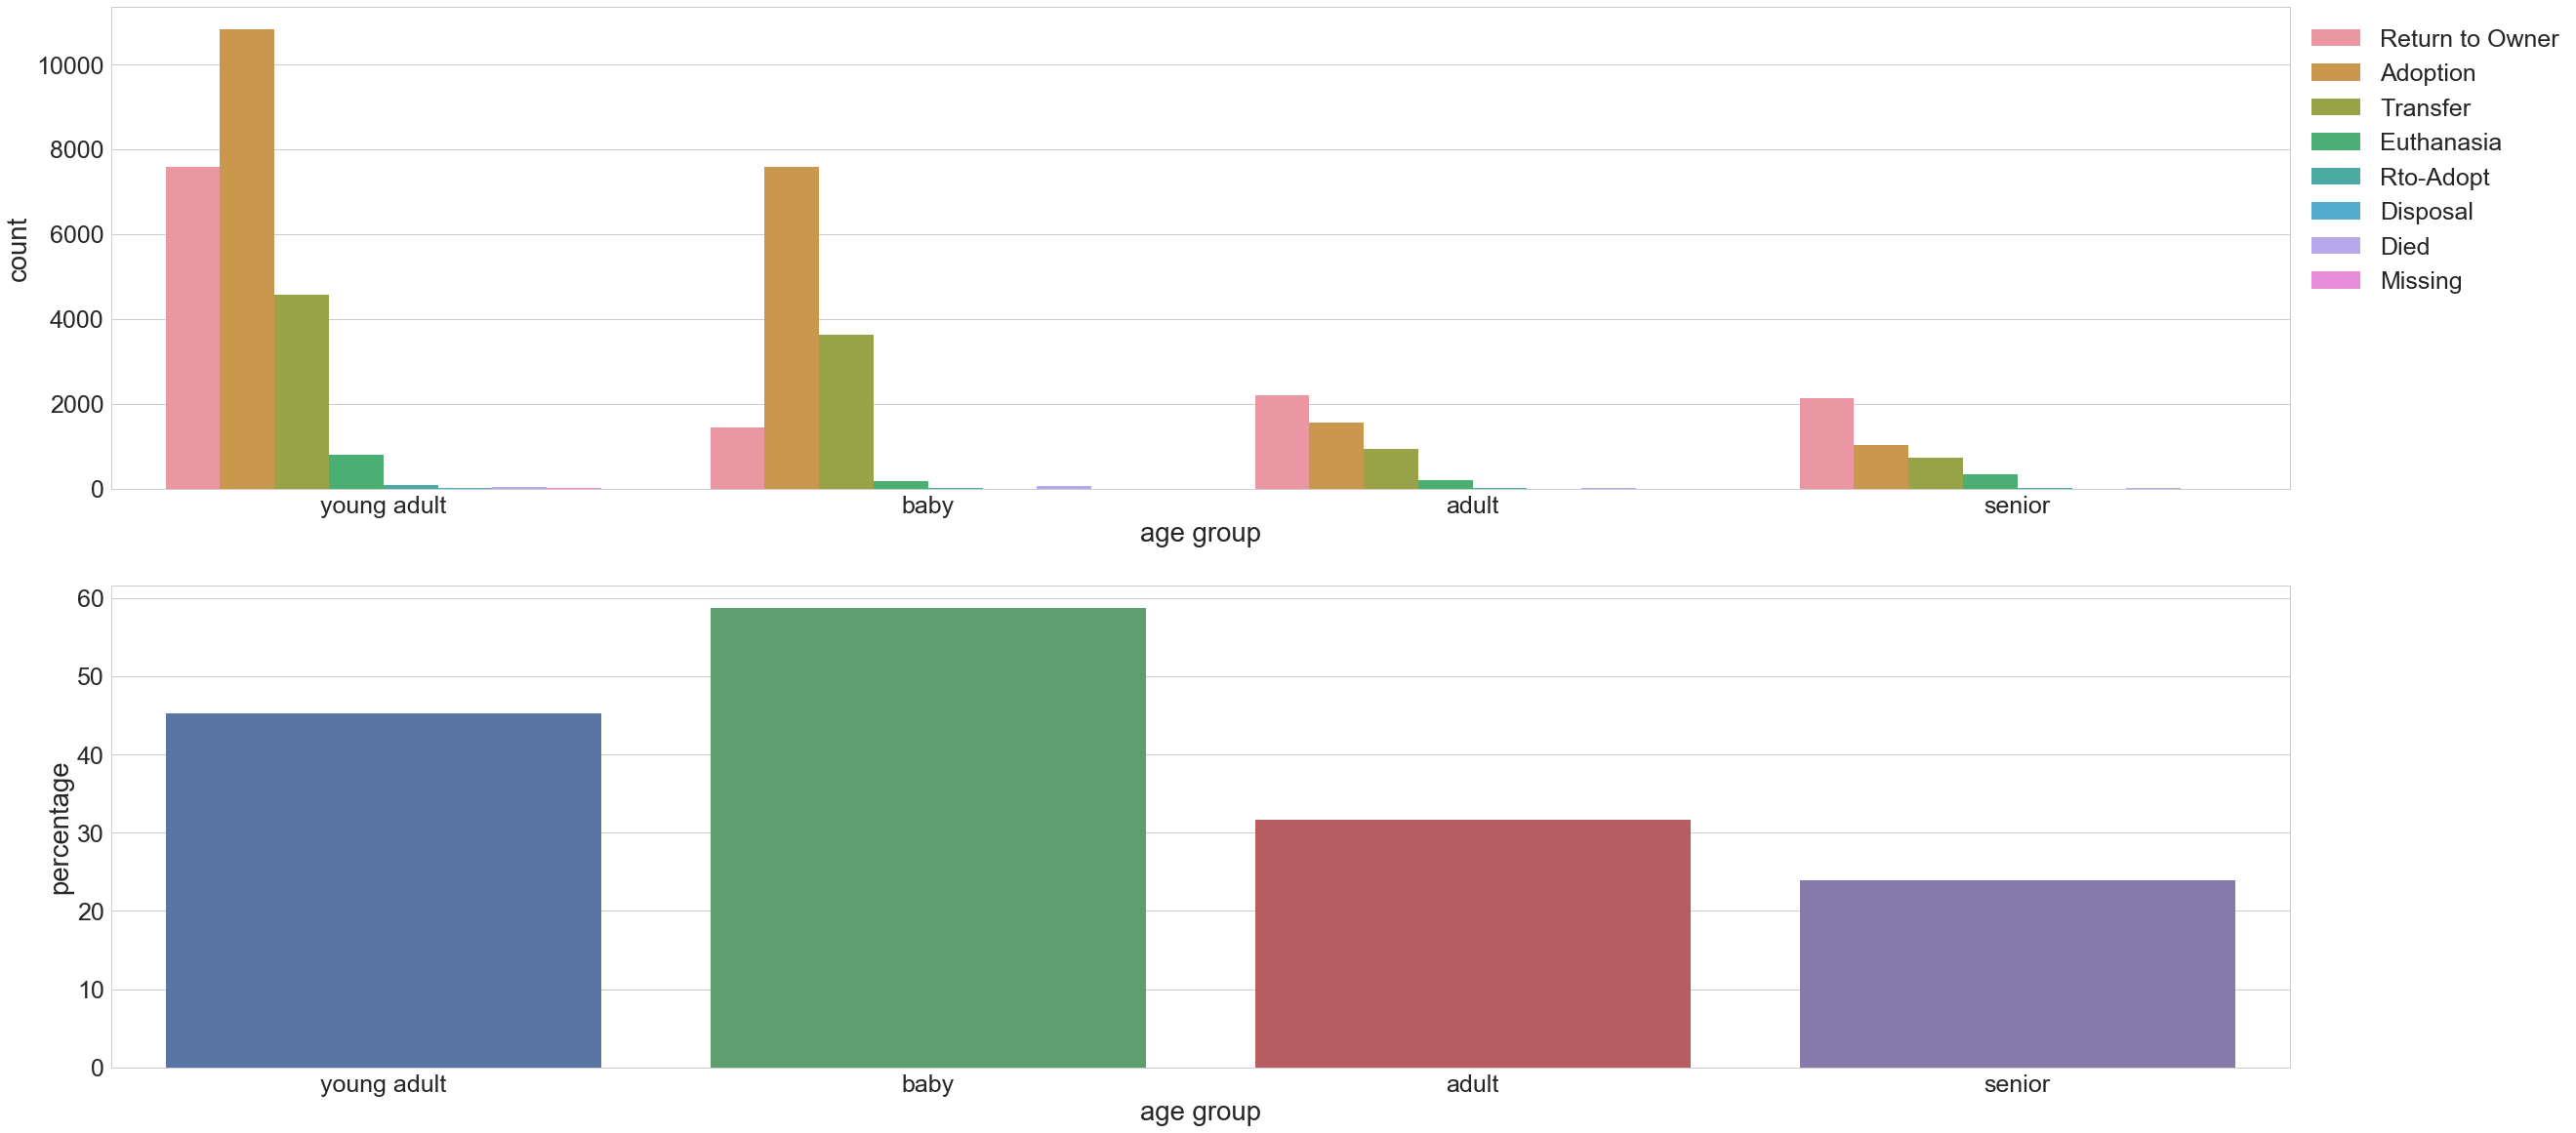

In [187]:
# Which are age group distribution among dogs? what age group of dogs are most likely to get adopted? 
sns.set_style("whitegrid")

fig,ax=plt.subplots(2,figsize=(40,20))
ax7=sns.countplot(x='age group',data=dog,order=dog['age group'].value_counts().index,hue='Outcome Type',ax=ax[0])
ax7.legend(loc='upper left', bbox_to_anchor=(1, 1))


df3=pd.DataFrame(adopted_dog['age group'].value_counts().head(8))
df3=df3.rename(columns = {'age group':'adopted'})

df4=pd.DataFrame(dog['age group'].value_counts().head(8))
df4=df4.rename(columns={'age group':'total'})

result_1 = pd.concat([df3, df4], axis=1).reset_index()
result_1['percentage']=result_1['adopted']/result_1['total']*100
result_1=result_1.rename(columns={'index':'age group'})
sns.barplot(x='age group',y='percentage',data=result_1,ax=ax[1])


In [277]:

temp=aac[aac['dogcat']==1]
black_dog_counts = pd.DataFrame(temp.groupby(['black pet','Animal Type'])['Outcome Type'].value_counts().reset_index(name='count'))


Text(0.5,1,'Non_Black pet outcome distribution')

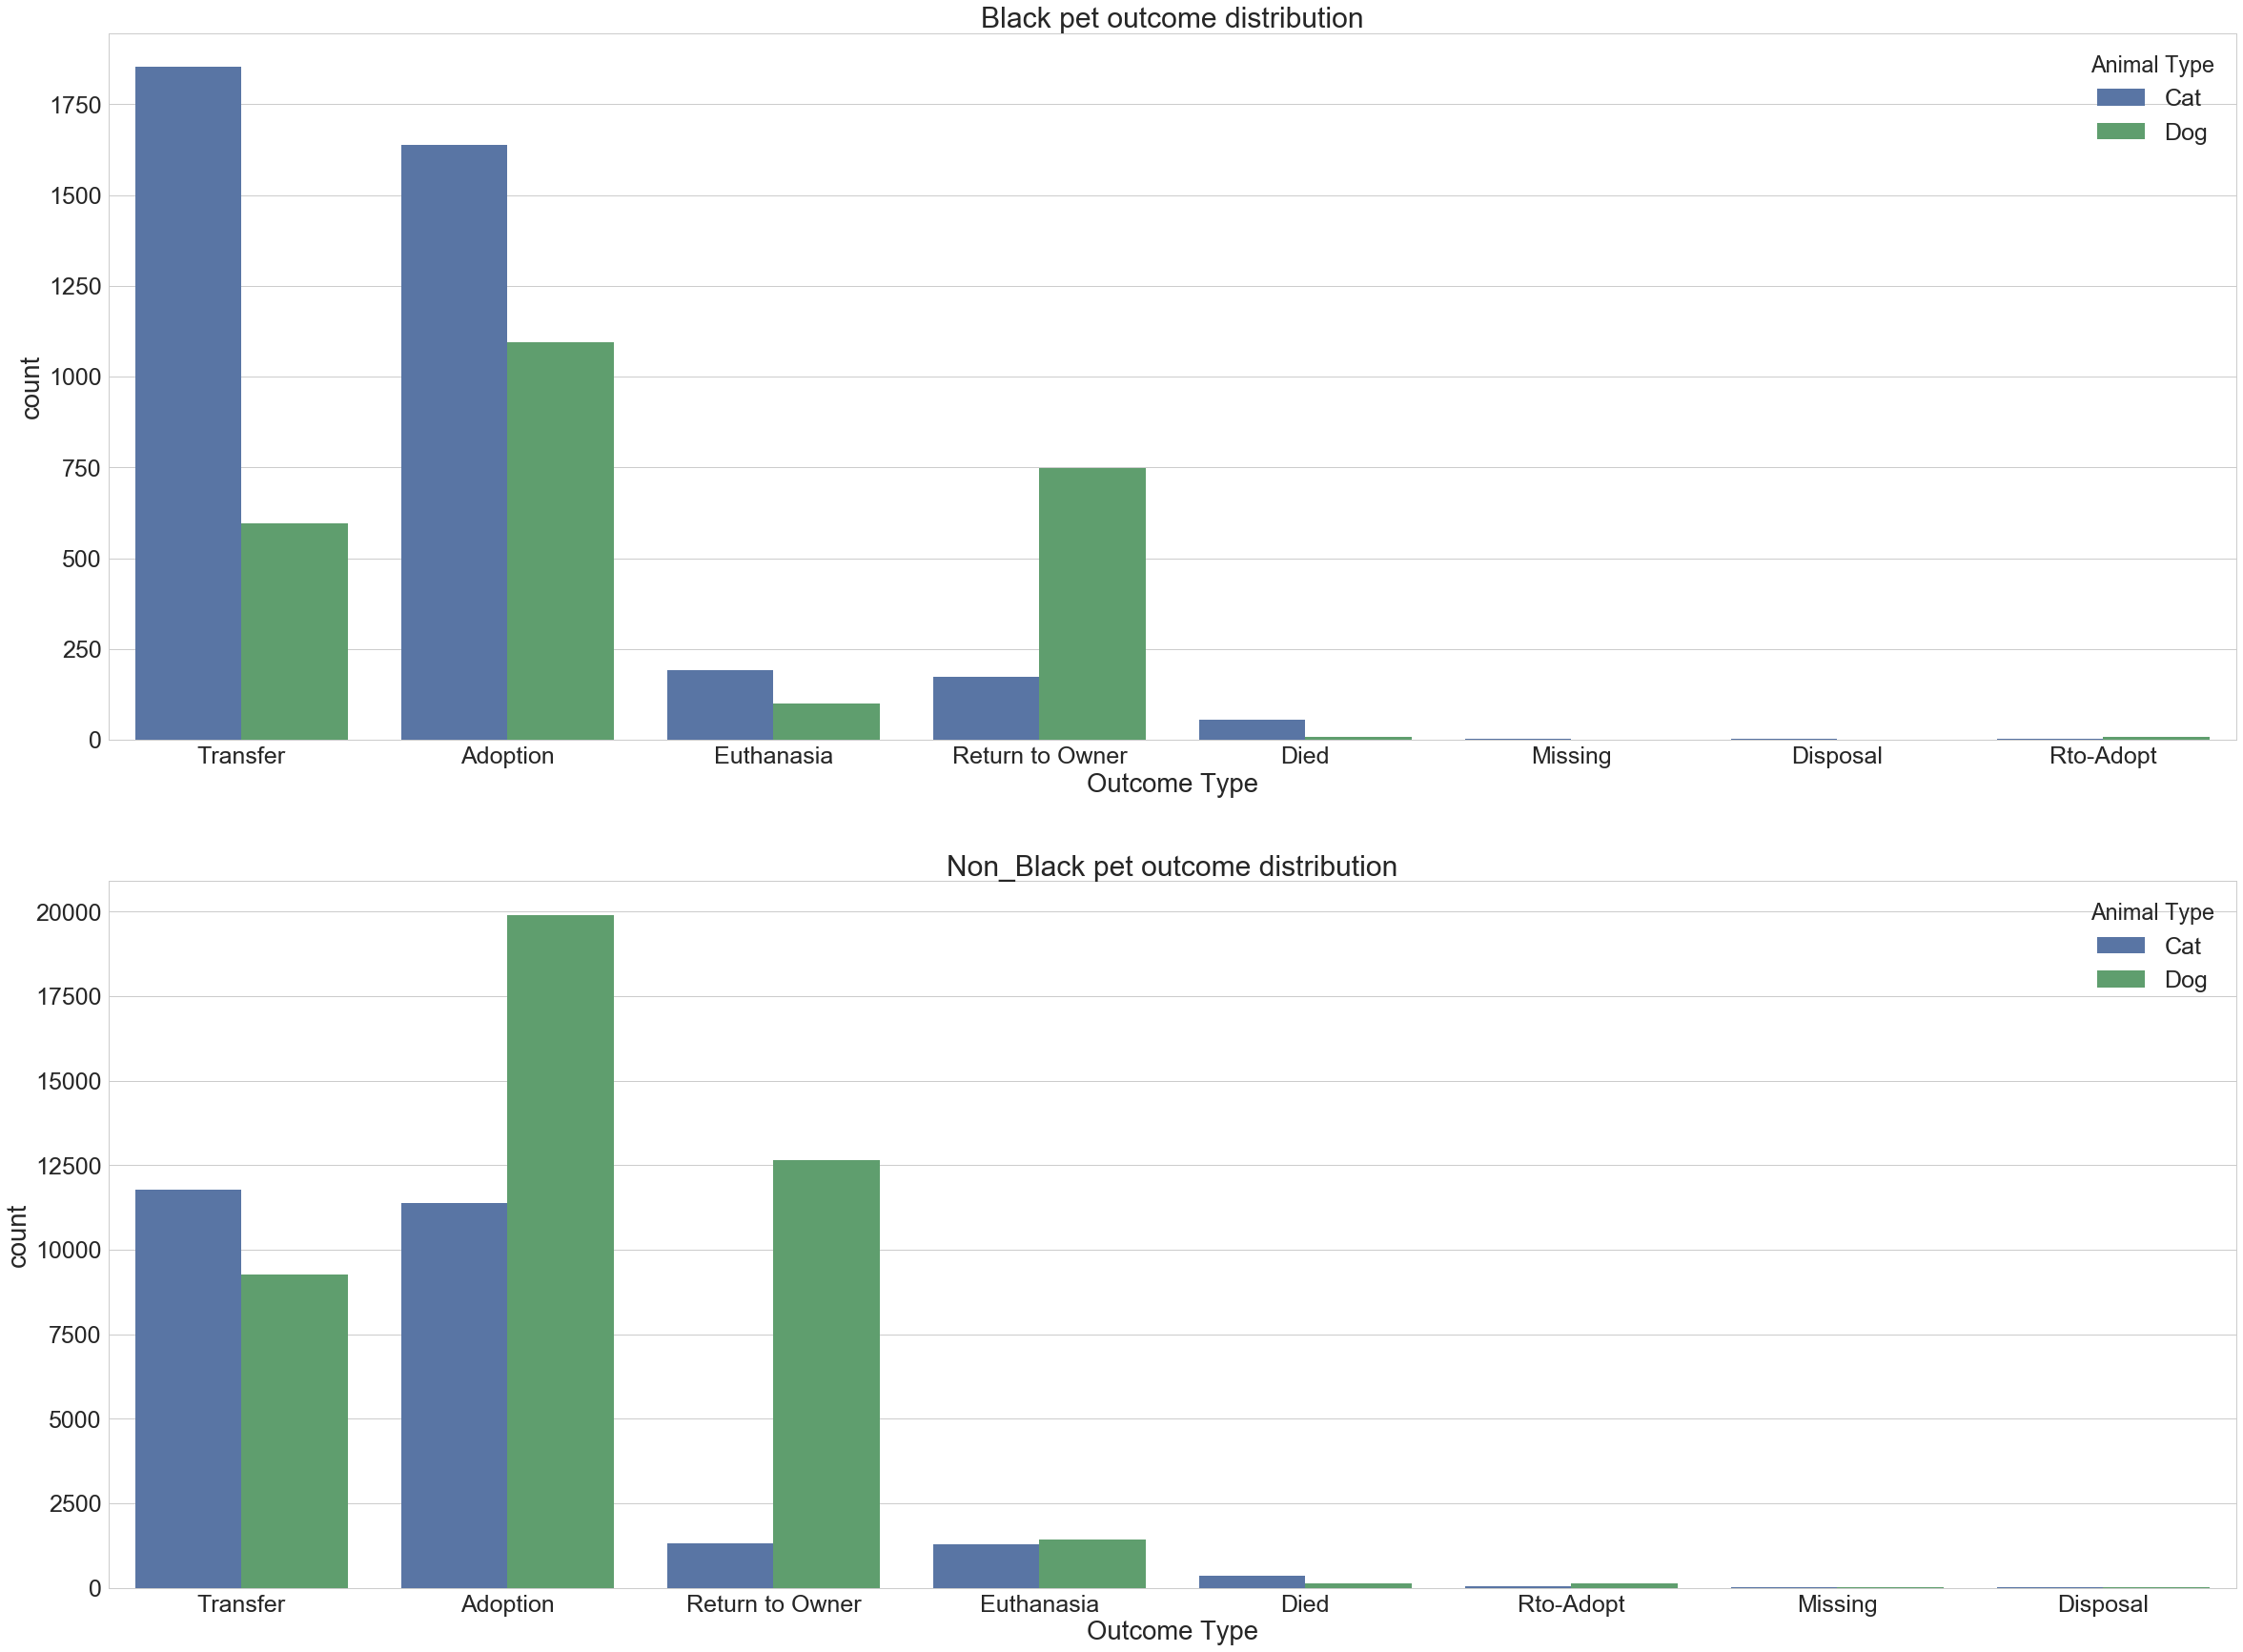

In [274]:
# Does dog color have an effect on adoption of cats and dogs?

fig,ax=plt.subplots(2,figsize=(40,30))

b = sns.barplot(x='Outcome Type', y='count',hue='Animal Type',data=black_dog_counts[black_dog_counts['black pet']==1],ax=ax[0])
b.set_title('Black pet outcome distribution')

nb= sns.barplot(x='Outcome Type', y='count',hue='Animal Type',data=black_dog_counts[black_dog_counts['black pet']==0],ax=ax[1])
nb.set_title('Non_Black pet outcome distribution')

<function matplotlib.pyplot.tight_layout>

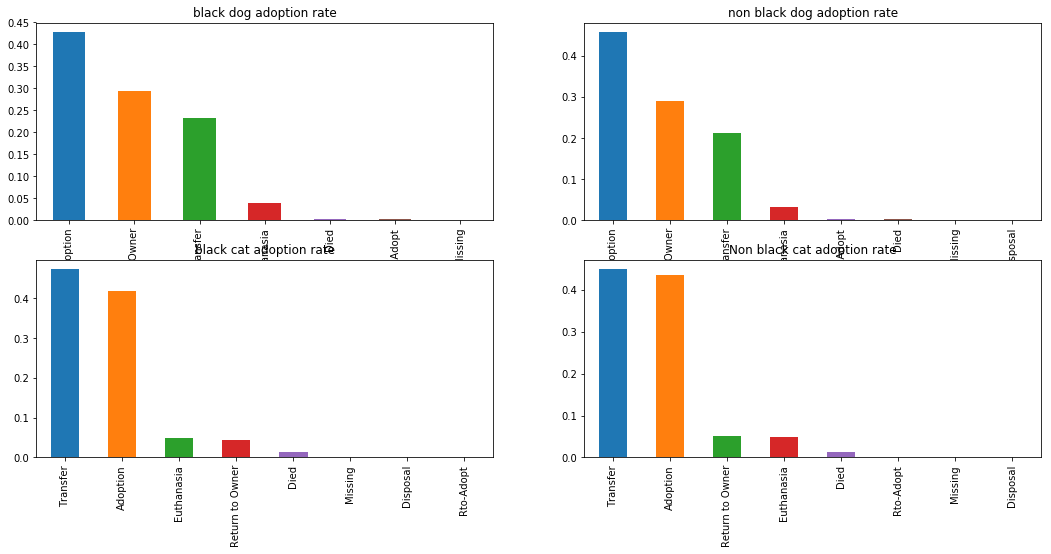

In [71]:
fig = plt.figure(figsize=(18,8))
plt.subplot2grid((2,2),(0,0))
plt.title("black dog adoption rate")
dog[dog['black pet']==1]['Outcome Type'].value_counts(normalize=True).plot(kind='bar')

plt.subplot2grid((2,2),(0,1))
plt.title("non black dog adoption rate")
dog[dog['black pet']==0]['Outcome Type'].value_counts(normalize=True).plot(kind='bar')

plt.subplot2grid((2,2),(1,0))
plt.title("black cat adoption rate")
cat[cat['black pet']==1]['Outcome Type'].value_counts(normalize=True).plot(kind='bar')

plt.subplot2grid((2,2),(1,1))
plt.title("Non black cat adoption rate")
cat[cat['black pet']==0]['Outcome Type'].value_counts(normalize=True).plot(kind='bar')

plt.tight_layout

Text(0.5,1,'Escaped Dogs Age Distribution')

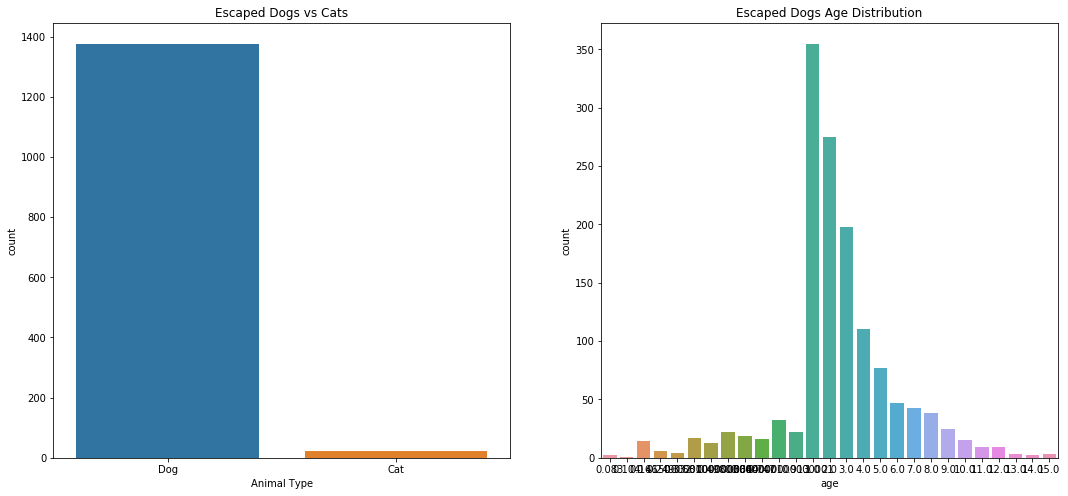

In [206]:
fig = plt.figure(figsize=(18,8))


c = aac.index.value_counts()
idx = c[c > 3].index
res = aac.loc[aac.index.isin(idx)]

plt.subplot2grid((1,2),(0,0))
sns.countplot(x='Animal Type',data=res)
plt.title('Escaped Dogs vs Cats')

plt.subplot2grid((1,2),(0,1))
escape_dog=res[res['Animal Type']=='Dog']
sns.countplot(x='age',data=escape_dog)
plt.title('Escaped Dogs Age Distribution')


In [170]:
d=aac.index.value_counts()
d[d>5]

A721033    14
A706536    11
A718223    11
A716018     9
A694501     8
A738324     8
A616444     8
A735601     7
A593537     7
A671704     7
A738073     7
A701901     7
A683108     7
A678294     7
A670612     7
A704287     6
A701265     6
A740335     6
A705625     6
A462580     6
A695857     6
A688610     6
A667894     6
A732618     6
A623561     6
A718877     6
A703649     6
A663819     6
A665334     6
A690234     6
A730415     6
A733594     6
A683030     6
A693283     6
A690543     6
A719117     6
A676423     6
A678174     6
A700396     6
Name: Animal ID, dtype: int64

In [168]:
#what are the most popular male dog name?
aac[aac['Gender']==0]['Name'].value_counts().head(10)

Max        337
Rocky      240
Buddy      208
Charlie    175
Blue       150
Zeus       139
Jack       137
Chico      128
Bear       124
Duke       118
Name: Name, dtype: int64

In [169]:
#what are the most popular female dog name?
aac[aac['Gender']==1]['Name'].value_counts().head(10)

Bella       363
Luna        254
Princess    241
Daisy       241
Lucy        205
Lola        187
Coco        150
Sadie       134
Lily        130
Cookie      110
Name: Name, dtype: int64

In [ ]:
# prediction 

In [218]:
# this function provides a visualization of confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [219]:
cat_outcomes = pd.read_csv('aac_shelter_cat_outcome_eng.csv')

In [227]:
cat_outcomes = cat_outcomes.loc[(cat_outcomes['outcome_type'] == 'Adoption') | 
                                 (cat_outcomes['outcome_type'] == 'Transfer')]


In [231]:
pd.set_option('display.max_columns', None)
cat_outcomes['outcome_subtype']=np.where(pd.isnull(cat_outcomes['outcome_subtype']),
                                         cat_outcomes['outcome_type'],
                                         cat_outcomes['outcome_subtype'])
                                        

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [232]:
cat_outcomes['outcome_subtype'].value_counts()

Partner     9486
Adoption    9264
Foster      3357
SCRP        3211
Snr          625
Offsite      110
Barn           2
Name: outcome_subtype, dtype: int64

In [243]:
x = cat_outcomes.filter(items=['sex_upon_outcome', 'breed', 'color', 'coat_pattern', 
                               'domestic_breed', 'dob_month', 'age_group', 'outcome_month', 
                               'outcome_weekday', 'outcome_hour', 'Cat/Kitten (outcome)'])

In [245]:
for col in x:
    x[col] = x[col].astype('category')
    
y = cat_outcomes['outcome_subtype'].astype('category')

In [248]:
xd = pd.get_dummies(x)

In [257]:
xnames = xd.columns
xarr = np.array(xd)

In [258]:
yarr, ynames = pd.factorize(cat_outcomes['outcome_subtype'])

In [263]:
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.externals import joblib

import warnings
warnings.simplefilter('ignore')

In [264]:
x_train, x_test, y_train, y_test = train_test_split(xarr, yarr, 
                                                    test_size=0.3, random_state=1)

In [266]:
aac['Gender']=aac['Sex upon Outcome'].apply(lambda x:0 if x=='Neutered Male'or x== 'Intact M

,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,dogcat,month,year,weekday,Day of Week,Gender,Spay/Neuter,black pet,Periods,Period Range,age,age group
Animal ID,,,,,,,,,,,,,,,,,,,,,,,
A658751,Benji,2016-11-13 13:38:00,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,1,11,2016,6,Sun,0,Yes,0,5,1.0000,5.0000,adult
A697000,Boone,2015-02-16 13:24:00,02/16/2015 01:24:00 PM,02/16/2009,Return to Owner,NaN,Dog,Neutered Male,6 years,English Springer Spaniel Mix,Liver/White,1,2,2015,0,Mon,0,Yes,0,6,1.0000,6.0000,adult
A697055,Megatron,2015-02-17 15:06:00,02/17/2015 03:06:00 PM,02/17/2012,Adoption,NaN,Dog,Spayed Female,3 years,Dachshund/Chihuahua Shorthair,Red,1,2,2015,1,Tue,2,Yes,0,3,1.0000,3.0000,young adult
A746650,Rose,2017-04-07 11:58:00,04/07/2017 11:58:00 AM,04/06/2016,Return to Owner,NaN,Dog,Intact Female,1 year,Labrador Retriever/Jack Russell Terrier,Yellow,1,4,2017,4,Fri,2,No,0,1,1.0000,1.0000,young adult
A666430,Lucy,2013-11-07 11:47:00,11/07/2013 11:47:00 AM,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1,11,2013,3,Thu,2,Yes,0,1,1.0000,1.0000,young adult
A675708,*Johnny,2014-06-03 14:20:00,06/03/2014 02:20:00 PM,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1,6,2014,1,Tue,0,Yes,0,1,1.0000,1.0000,young adult
A680386,Monday,2014-06-15 15:50:00,06/15/2014 03:50:00 PM,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1,6,2014,6,Sun,0,Yes,0,9,1.0000,9.0000,senior
A750122,Happy Camper,2017-05-24 18:36:00,05/24/2017 06:36:00 PM,04/08/2017,Transfer,Partner,Dog,Intact Male,1 month,Labrador Retriever Mix,Black,1,5,2017,2,Wed,0,No,1,1,0.0830,0.0830,baby
A664462,*Edgar,2013-10-07 13:06:00,10/07/2013 01:06:00 PM,06/03/2013,Transfer,Partner,Dog,Intact Male,4 months,Leonberger Mix,Brown/White,1,10,2013,0,Mon,0,No,0,4,0.0830,0.3320,baby


In [33]:
dog['age_group']=dog['age group'].apply(lambda x: 0 if x=='baby' else(1 if x=='young adult' else(2 if x=='adult' else 3)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
dog['spay/neuter']=dog['Spay/Neuter'].apply(lambda x:0 if x=='Yes' else 1)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
dog= dog.loc[(dog['Outcome Type'] == 'Adoption') | 
                                 (dog['Outcome Type'] == 'Transfer')|(dog['Outcome Type'] == 'Return to Owner')]
dog['Outcome_Type']=dog['Outcome Type'].apply(lambda x: 0 if x=='Transfer' else (1 if x=='Adoption' else 2 ))


In [68]:
from sklearn.model_selection import train_test_split

In [152]:
X = dog[['age_group', 'spay/neuter', 'black pet','Gender']]
y = dog['Outcome_Type']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [156]:
predictions = logmodel.predict(X_test)

In [157]:
from sklearn.metrics import classification_report

In [158]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.56      0.38      0.46      3242
          1       0.62      0.89      0.73      7055
          2       0.53      0.27      0.36      4303

avg / total       0.58      0.60      0.56     14600



In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
rfc = RandomForestClassifier(n_estimators=600)

In [161]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [162]:
predictions = rfc.predict(X_test)

In [163]:
from sklearn.metrics import classification_report,confusion_matrix

In [164]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.72      0.27      0.39      3242
          1       0.63      0.85      0.73      7055
          2       0.51      0.47      0.49      4303

avg / total       0.62      0.61      0.58     14600

